# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [40]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📁 **LECTURA DEL DATASET**

In [41]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [42]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [43]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().sum() / len(df)) * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({'missing_count': missing_summary, 'missing_percent': missing_percent})  # ← COMPLETAR
    missing_info =  missing_info[missing_info['missing_count'] > 0] # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [44]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,missing_count,missing_percent
estado,2622,57.563117
Area Construcción,1259,27.639956
Terreno,1728,37.936334
Total M²,1,0.021954
estadoTran,4331,95.082327
tipoTran,3,0.065862


In [45]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
    plt.title('Mapa de Calor de Resumen de Valores Faltantes por Columna')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


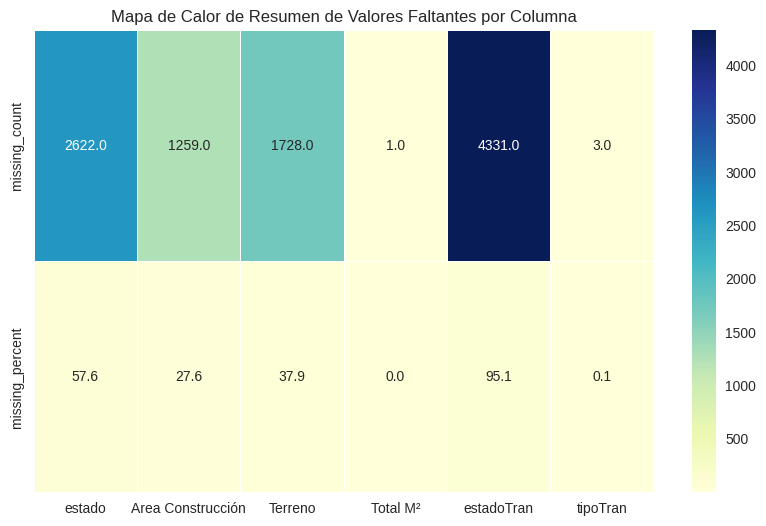

In [46]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

*   Las columnas con mayor porcentaje de valores faltantes son: estadoTran: **95.1%**, estado: **57.6%**, Terreno: **37.9%** y área de construcción con: **27.56%**

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

*   Hay columnas con una cantidad alta de valores faltantes, como estadoTran casi el 95%; otras columnas tienen una cantidad considerable, como estado 57.6% y Terreno 37.9%. Hay un grupo con valores faltantes moderados, como Area Construcción 27.6%

*   Hay columnas con una cantidad mínima de valores faltantes, como Total M² 0.02% y tipoTran 0.07%. Este patrón indica que el problema de valores faltantes no es uniforme en todo el dataset, sino que se concentra fuertemente en unas variables específicas.

*   Patrones de co-ocurrencia, si la falta de datos en una columna está relacionada con la falta de datos en otra para las mismas filas. Distribución no uniforme de valores faltantes o valores faltantes concentrados en características específicas. Esto significa que la cantidad de datos faltantes varía significativamente entre las diferentes columnas.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

1. estadoTran (95.08% faltante): Debido a que casi todos sus valores están ausentes,  muestra una alta correlación positiva con la ausencia de datos en sí misma. Además, su casi completa falta de datos podría implicar una baja correlación con la ausencia de datos en otras columnas si la información de estadoTran fue sistemáticamente no recopilada, o podría indicar que si un registro tiene estadoTran faltante, también faltan otras características, aunque en menor medida.

2. estado (57.56% faltante), Terreno (37.94% faltante) y Area Construcción (27.64% faltante): Estas columnas tienen porcentajes significativos de valores faltantes. Es plausible que haya alguna correlación positiva entre la falta de datos en Area Construcción y Terreno, ya que ambos son atributos relacionados con las dimensiones de la propiedad. Si un inmueble no tiene información de superficie construida, podría ser que tampoco la tenga de superficie de terreno, o que la información se recopile de forma incompleta para ese tipo de propiedades.

3. Total M² (0.02% faltante) y tipoTran (0.07% faltante): Con un porcentaje tan bajo de valores faltantes, es poco probable que muestren una correlación significativa con la falta de datos en otras columnas, o que su falta esté fuertemente ligada a la de otras variables.


In [49]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    numerical_df = df.select_dtypes(include=np.number) # Seleccionar solo columnas numéricas
    correlation_matrix = numerical_df.corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

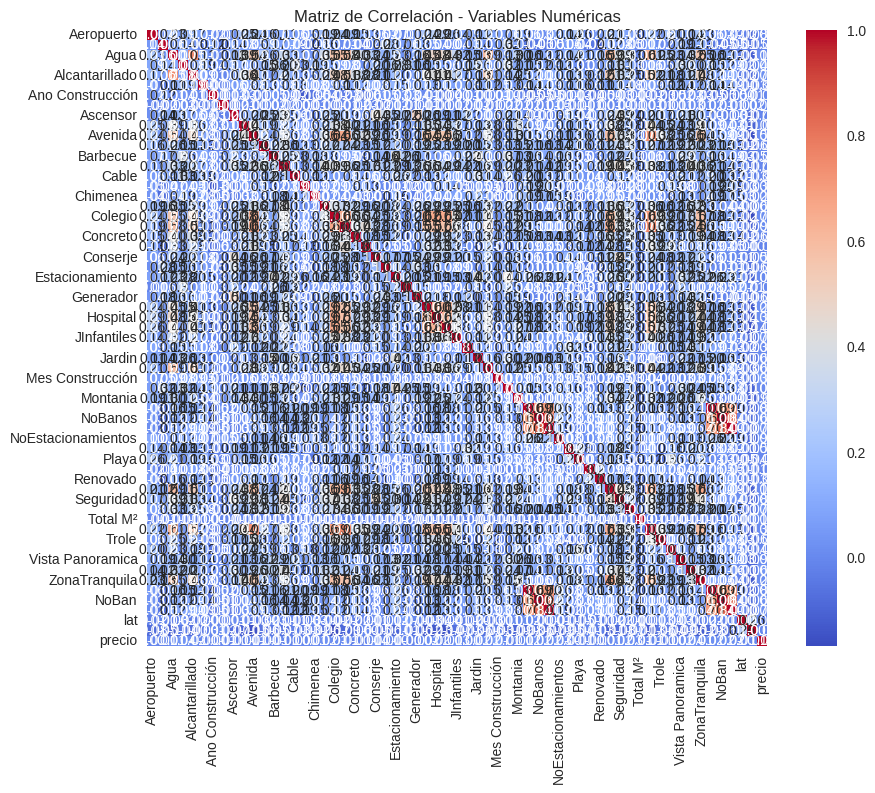

In [50]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**

Preguntas para el Análisis: ¿Los valores faltantes son MCAR, MAR o MNAR?

*   **MCAR (Missing Completely At Random - Faltantes Completamente al Azar):** Es **improbable** que la mayoría de los valores faltantes sean MCAR. Por la **gran disparidad en el porcentaje de datos faltantes** entre las columnas. Si los datos faltaran completamente al azar, esperaríamos porcentajes de missingness más uniformes en todo el dataset, o al menos no tan extremos como `estadoTran` (95%) frente a `Total M²` (0.02%). Esta heterogeneidad sugiere que la ausencia de datos no es un evento aleatorio independiente de todo lo demás.

*   **MAR (Missing At Random - Faltantes al Azar):** Es **posible** que algunos valores faltantes sean MAR. Esto ocurriría si la probabilidad de que un valor falte depende de otras variables *observadas* en el dataset, pero no del valor del dato faltante en sí.

*   **MNAR (Missing Not At Random - Faltantes No al Azar):** Es **altamente probable** que algunos valores, especialmente aquellos con porcentajes de faltantes muy altos como `estadoTran` (95%) y `estado` (57.56%), sean MNAR. Esto sucede cuando la probabilidad de que un valor falte depende del valor faltante en sí mismo, incluso después de considerar otras variables. Por ejemplo:
    *   `estadoTran` podría faltar si la propiedad *no está en proceso de transferencia* o si la transferencia no es relevante para el tipo de propiedad. El hecho de que falte el dato es informativo sobre el estado real de la transferencia.
    *   Si `Area Construcción` falta para propiedades que son muy pequeñas o muy grandes (extremos), y esta información no está capturada por otras variables observadas, sería MNAR.

**¿Qué variables podrían predecir la presencia de valores faltantes?**

1.  **Variables de Identificación de Propiedad:** Es posible que variables como `tipoInmueble`, `usoInmueble`, o `Ano Construcción` puedan predecir la falta de datos en `Area Construcción` y `Terreno`.

2.  **Variables Relacionadas con el Estado de la Transacción:** `estadoTran` y `estado` son altamente correlacionadas con la propia falta de información. Es decir, la ausencia de un dato en `estadoTran` probablemente indica que la propiedad no está en una transacción activa o el dato no es aplicable. Otras variables relacionadas con el proceso de venta o listado podrían ser predictoras (aunque no las hemos analizado explícitamente).

3.  **Variables Categóricas (sin analizar):** Sería crucial analizar las relaciones entre la falta de datos en columnas numéricas (como `Area Construcción`, `Terreno`) y las variables categóricas (`tipoInmueble`, `ciudad`, `sector`, `parroquia`, etc.).

4.  **Otras Columnas con Patrones de Missingness Similares:** Si al analizar la correlación de missingness vemos que `Area Construcción` y `Terreno` a menudo faltan juntas, esto sugiere una correlación en su ausencia. Esto no predice *qué* hace que falten, pero sí que su ausencia está ligada.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [53]:
# Aplique una técnica adecuada para cada columna de valor faltante.


# --- Imputación de 'estadoTran' y 'estado' (Categóricas) ---
# Se imputa 'estadoTran' con 'Desconocido' debido al alto porcentaje de valores faltantes
df['estadoTran'] = df['estadoTran'].fillna('Desconocido')
print(f"'estadoTran' imputado con 'Desconocido'.")


# Se imputa 'estado' con la moda (categórica, 57% faltante)
mode_estado = df['estado'].mode()[0]
df['estado'] = df['estado'].fillna(mode_estado)
print(f"'estado' imputado con la moda: {mode_estado}")


# --- Imputación de 'Area Construcción' y 'Terreno' (Numéricas) ---
# Limpiar y convertir 'Area Construcción' a numérica antes de imputar
df['Area Construcción'] = df['Area Construcción'].astype(str).str.replace(',', '', regex=False).astype(float)
# Imputar 'Area Construcción' con la mediana
median_area_construccion = df['Area Construcción'].median()
df['Area Construcción'] = df['Area Construcción'].fillna(median_area_construccion)
print(f"'Area Construcción' imputada con la mediana: {median_area_construccion}")


# Limpiar y convertir 'Terreno' a numérica antes de imputar
df['Terreno'] = df['Terreno'].astype(str).str.replace(',', '', regex=False).astype(float)
# Imputar 'Terreno' con la mediana
median_terreno = df['Terreno'].median()
df['Terreno'] = df['Terreno'].fillna(median_terreno)
print(f"'Terreno' imputado con la mediana: {median_terreno}")


# --- Imputación de 'Total M²' y 'tipoTran' (MCAR o con pocos valores faltantes) ---
# Imputar 'Total M²' con la mediana (numérica, 1 valor faltante)
median_total_m2 = df['Total M²'].median()
df['Total M²'] = df['Total M²'].fillna(median_total_m2)
print(f"'Total M²' imputado con la mediana: {median_total_m2}")


# Imputar 'tipoTran' con la moda (categórica, 3 valores faltantes)
mode_tipo_tran = df['tipoTran'].mode()[0]
df['tipoTran'] = df['tipoTran'].fillna(mode_tipo_tran)
print(f"'tipoTran' imputado con la moda: {mode_tipo_tran}")


# --- Verificación Final ---
print("\nVerificación de valores faltantes después de todas las imputaciones:")
display(df.isnull().sum()[df.isnull().sum() > 0])


remaining_missing = df[['estadoTran', 'estado', 'Area Construcción', 'Terreno', 'Total M²', 'tipoTran']].isnull().sum().sum()
if remaining_missing == 0:
    print("\n¡Todos los valores faltantes identificados han sido imputados!")
else:
    print(f"\nTodavía quedan {remaining_missing} valores faltantes en las columnas principales después de la imputación.")

'estadoTran' imputado con 'Desconocido'.
'estado' imputado con la moda: Usada
'Area Construcción' imputada con la mediana: 158.685
'Terreno' imputado con la mediana: 234.0
'Total M²' imputado con la mediana: 200.0
'tipoTran' imputado con la moda: De Venta

Verificación de valores faltantes después de todas las imputaciones:


,0



¡Todos los valores faltantes identificados han sido imputados!


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [54]:
from scipy.stats import chi2_contingency

# Obtener las columnas categóricas después de la imputación
categorical_cols = df.select_dtypes(include='object').columns

print(f"Columnas categóricas disponibles: {list(categorical_cols)}")

# Seleccionar dos atributos categóricos para el análisis
# Usaremos 'estado' y 'tipoTran' como ejemplo, ya que ambos tuvieron valores faltantes y fueron imputados
col1 = 'estado'
col2 = 'tipoTran'

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df[col1], df[col2])

print(f"\nTabla de contingencia para '{col1}' vs '{col2}':")
display(contingency_table)

# Aplicar la prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nResultados de la prueba de Chi-cuadrado para '{col1}' vs '{col2}':")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad: {dof}")

# Interpretar el valor p
alpha = 0.05
if p_value < alpha:
    print(f"Con un nivel de significancia de {alpha}, rechazamos la hipótesis nula.")
    print(f"Existe una relación estadísticamente significativa entre '{col1}' y '{col2}'.")
else:
    print(f"Con un nivel de significancia de {alpha}, no rechazamos la hipótesis nula.")
    print(f"No hay suficiente evidencia para decir que existe una relación estadísticamente significativa entre '{col1}' y '{col2}'.")

Columnas categóricas disponibles: ['_id', 'estado', 'direccion', 'NoMetros', 'estadoTran', 'price', 'tipoInv', 'tipoTran', 'titulo']

Tabla de contingencia para 'estado' vs 'tipoTran':


tipoTran,De Venta
estado,
En Construcción / En Planos,78
PROBABLE,4
Por Estrenar,491
RESERVADA,33
Reconstruida/ Renovada,136
Usada,3749
VENDIDA,64



Resultados de la prueba de Chi-cuadrado para 'estado' vs 'tipoTran':
Estadístico Chi-cuadrado: 0.0000
Valor p: 1.0000
Grados de libertad: 0
Con un nivel de significancia de 0.05, no rechazamos la hipótesis nula.
No hay suficiente evidencia para decir que existe una relación estadísticamente significativa entre 'estado' y 'tipoTran'.


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [38]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
# Todos los valores faltantes, incluyendo los categóricos, fueron imputados en el Ejercicio 3.
# Por lo tanto, no hay código adicional para añadir aquí.

In [55]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Identificar columnas categóricas con valores faltantes
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].isna().sum() > 0]
print("Columnas categóricas con valores faltantes:", cat_cols)

# Crear una copia del DataFrame para imputar
df_cat_imputado = df.copy()

# Aplicar una técnica adecuada para cada columna categórica
for col in cat_cols:
    n_missing = df_cat_imputado[col].isna().sum()
    pct_missing = n_missing / len(df_cat_imputado) * 100
    print(f"\nColumna '{col}' tiene {pct_missing:.2f}% valores faltantes")

    if pct_missing < 10:
        # Pocos valores faltantes → usar la moda
        imputer = SimpleImputer(strategy='most_frequent')
        df_cat_imputado[col] = imputer.fit_transform(df_cat_imputado[[col]])
        print(f"Imputada '{col}' con la moda")

    elif 10 <= pct_missing < 50:
        # Porcentaje medio → crear categoría “Desconocido” para no sesgar
        df_cat_imputado[col] = df_cat_imputado[col].fillna('Desconocido')
        print(f"Imputada '{col}' con categoría 'Desconocido'")

    else:
        # Demasiados faltantes → mejor marcar o eliminar según análisis previo
        df_cat_imputado[col] = df_cat_imputado[col].fillna('Sin Información')
        print(f"Columna '{col}' con alto % de faltantes. Se imputó con 'Sin Información' (alternativa a eliminarla)")

# Verificar resultado
print("\nValores faltantes después de la imputación:")
print(df_cat_imputado[cat_cols].isna().sum())

# Mostrar las primeras filas imputadas
df_cat_imputado[cat_cols].head()


Columnas categóricas con valores faltantes: []

Valores faltantes después de la imputación:
Series([], dtype: float64)


""
0
1
2
3
4


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

*   estadoTran: de tipo categórica, difícil de imputar debido a la casi total ausencia de datos. La imputación con la moda no aporta información real, y se considera más apropiado eliminarla o crear una categoría especial “Desconocido”.

*   estado: de tipo categórica, más de la mitad de los valores faltan. Si se imputa con la moda, puede introducir sesgo porque las propiedades podrían tener diferentes estados según otras variables.

*   terreno: tipo numérica, la mediana fue útil, pero la proporción alta de faltantes aún puede distorsionar las estadísticas descriptivas.

*   Área de construcción: tipo numérica, también imputada con la mediana; el patrón de faltantes no es completamente aleatorio.

¿En qué casos consideraron que la eliminación era mejor que la imputación?

*   El porcentaje de valores faltantes era demasiado alto, lo que hacía que cualquier imputación resultara poco representativa.

Los valores faltantes parecían ser MNAR, por lo que una imputación podría distorsionar los datos.

La variable tenía baja relevancia analítica o no aportaba información crítica al modelo.

Se sugiere que estadoTran podría eliminarse o reemplazarse por una categoría “Desconocido”, ya que imputarla con la moda no aporta valor real.

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

Los faltantes de estadoTran y estado son probablemente MNAR, por lo que imputar puede sesgar los resultados.

Terreno y Área Construcción pueden ser MAR, y por eso se imputaron con la mediana, aprovechando la distribución de los datos.


# 🚀 ¡TALLER FINALIZADO!"